In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\Puneet Kumar\DataScience\Predict Password Strength Using NLP/dataset_password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [7]:
data.columns #see coluns in dataset

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
#index coluns not so important we can drop it

In [9]:
data.drop(["index"] , axis=1 , inplace=True)

In [10]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [11]:
#Now check for duplicate data/rows

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [13]:
data.duplicated().sum()

0

In [14]:
#Now check for missing values

In [15]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [16]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [17]:
data.isnull().any().sum()

0

In [18]:
#Data Types
data.dtypes

password    object
strength     int64
dtype: object

In [19]:
#Check for irrelevant data, like password strength is negative

In [20]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [21]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [22]:
# Perform semantic analysis

In [23]:
data.columns

Index(['password', 'strength'], dtype='object')

In [24]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [25]:
data['password'][0]

'zxe870819'

In [26]:
type(data['password'][0])

str

In [27]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [28]:
# the password which has only numeric characters
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [29]:
# the password which has only numeric characters (shape)
data[data["password"].str.isnumeric()].shape

(26, 2)

In [30]:
# the password which has only Upper case characters
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [31]:
# the password which has alpha case characters
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [32]:
# the password which has alpha numeric case characters
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [33]:
# the password which has title case characters , title case has first letter capital
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [34]:
# Noe we will find the password which has some speacial characters
# there is no builin fuction for this


In [35]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [36]:
import string

In [37]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [39]:
data["password"].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [40]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [41]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [42]:
#Calculate length of passwords

In [43]:
data["password"][0]

'zxe870819'

In [44]:
len(data["password"][0])

9

In [45]:
#another way

In [46]:
data["password"].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [47]:
data["length"] = data["password"].str.len()

In [48]:
data["length"] 

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [49]:
password = "Mypass788"

In [50]:
[char for char in password if char.islower()]  # list comprehension

['y', 'p', 'a', 's', 's']

In [51]:
len([char for char in password if char.islower()])

5

In [52]:
# for normalizing the value divide it to len of password
len([char for char in password if char.islower()])/len(password)

0.5555555555555556

In [53]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [54]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [55]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [56]:
data["lowercase_freq"] =  np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] =  np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] =  np.round(data["password"].apply(freq_numerical_case) , 3)

In [57]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [58]:
  # Now we will find special characters

In [59]:
def freq_speacial_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)


In [60]:
data["special_cahr_freq"]= np.round(data["password"].apply(freq_speacial_case) , 3)

In [61]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_cahr_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [62]:
#Now normalize the value
data["special_cahr_freq"] = data["special_cahr_freq"]/data["length"]

In [63]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_cahr_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [64]:
# We performed Data analysis then added some new features now we will again perform Data Analysis

In [65]:
# Performing Descriptive Stastics

In [66]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_cahr_freq'],
      dtype='object')

In [67]:
data[['length' , 'strength']].groupby(['strength']).agg(['min','max', 'mean', 'median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [68]:
cols = ['length','lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_cahr_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(['min','max', 'mean', 'median']))
    print('\n')
    print('-----------')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


-----------
lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


-----------
uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


-----------
digit_freq
         digit_freq                        
                min    max      mean median
strength    

In [69]:
# Now we will plot boxplot

<Axes: xlabel='strength', ylabel='special_cahr_freq'>

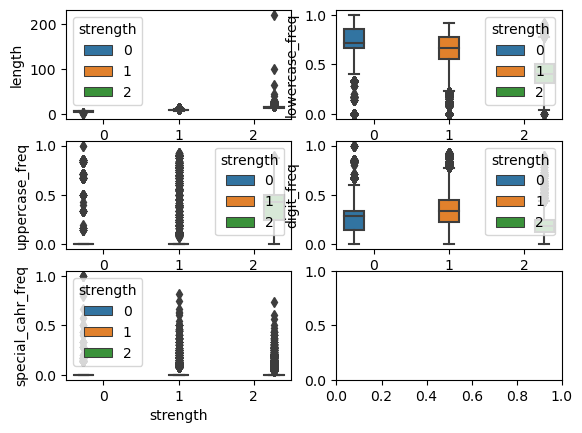

In [70]:
fig, ((ax1, ax2) , (ax3, ax4) , (ax5, ax6)) = plt.subplots(3, 2)

sns.boxplot(x="strength" , y="length" , hue="strength" , ax=ax1, data=data)
sns.boxplot(x="strength" , y="lowercase_freq" , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y="uppercase_freq" , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y="digit_freq" , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y="special_cahr_freq" , hue="strength" , ax=ax5, data=data)

In [71]:
# lets adjst some parameters to chang box plot size so data can be easily visibled.

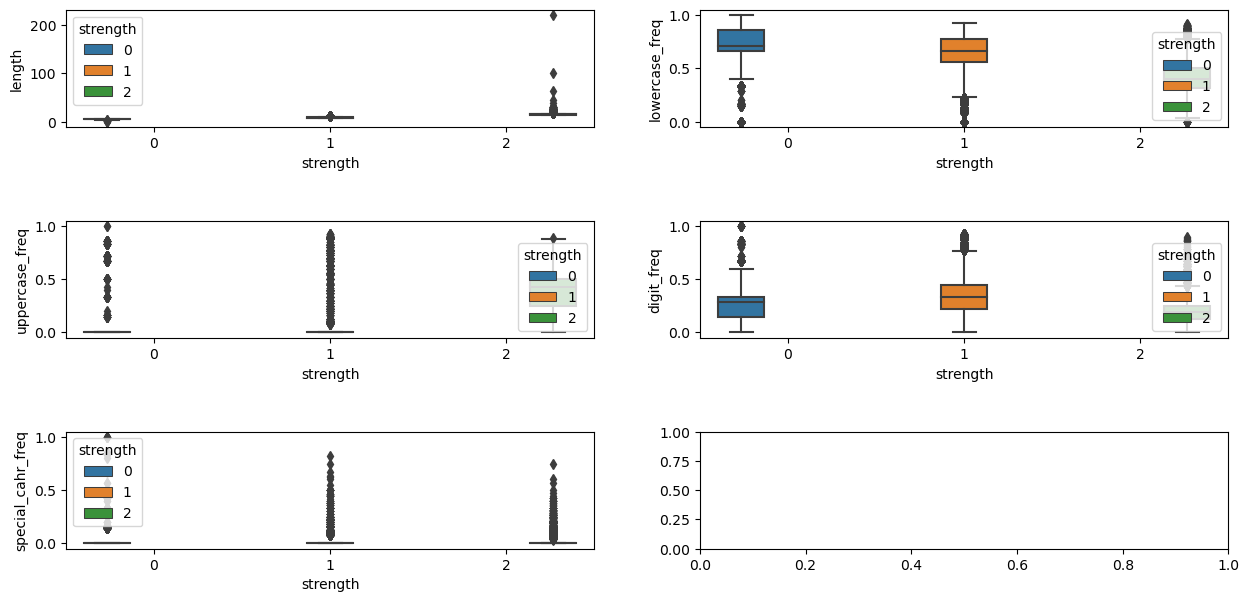

In [72]:
fig, ((ax1, ax2) , (ax3, ax4) , (ax5, ax6)) = plt.subplots(3, 2 , figsize=(15,7)) 

sns.boxplot(x="strength" , y="length" , hue="strength" , ax=ax1, data=data)
sns.boxplot(x="strength" , y="lowercase_freq" , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y="uppercase_freq" , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y="digit_freq" , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y="special_cahr_freq" , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.8)

In [73]:
#Feature Engineering

In [74]:
#Feature Importance, univariate Analysis-- oick one variable and analysis

In [75]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_cahr_freq'],
      dtype='object')

In [76]:
def get_dist(data , feature):
    
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data)
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color='red' , label='0' , hist=False)
    sns.distplot(data[data['strength']==1][feature] , color='blue' , label='0' , hist=False)  
    sns.distplot(data[data['strength']==2][feature] , color='orange' , label='0' , hist=False) 
    plt.legend()
    plt.show()

C:\Users\Puneet Kumar\AppData\Local\Temp\ipykernel_3500\1323804089.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['strength']==0][feature] , color='red' , label='0' , hist=False)
C:\Users\Puneet Kumar\AppData\Local\Temp\ipykernel_3500\1323804089.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

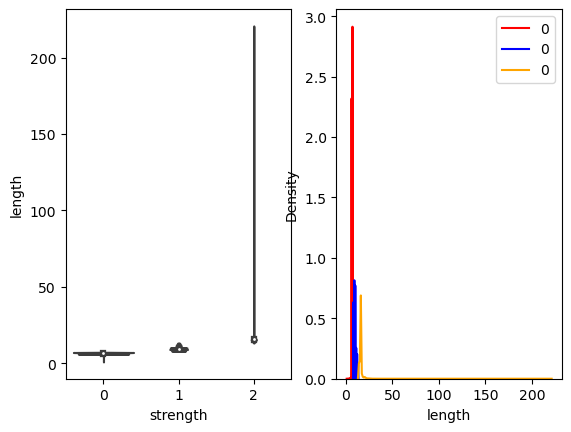

In [77]:
get_dist(data, "length")

In [78]:
# import warning packagage to import remove the warnings

In [79]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

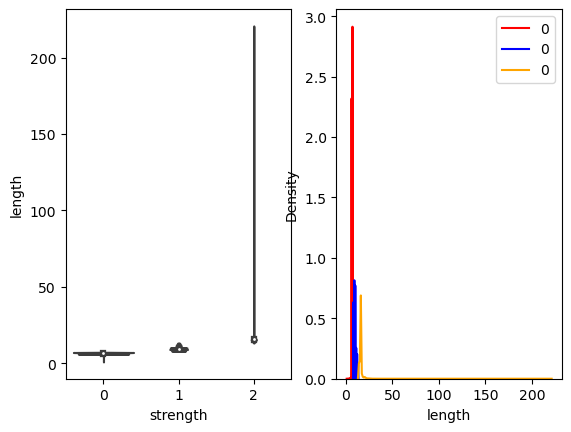

In [80]:
get_dist(data, "length")

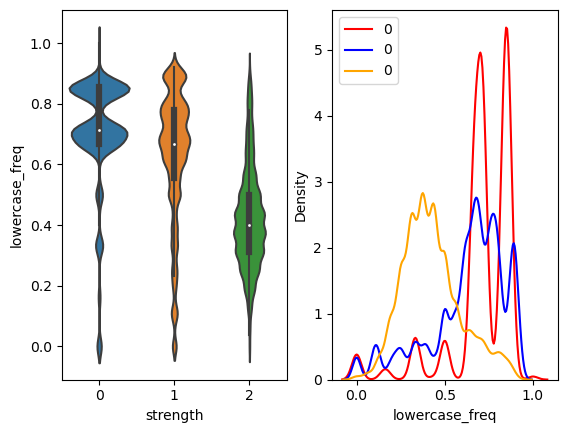

In [81]:
get_dist(data, "lowercase_freq")

In [82]:
#NLP Techniques, Text ---> Vector

In [83]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_cahr_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [84]:
dataframe = data.sample(frac=1) #Suffling the data

In [85]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_cahr_freq
73815,yuasa1,0,6,0.833,0.000,0.167,0.0
54894,123virgo,1,8,0.625,0.000,0.375,0.0
88866,thehell123,1,10,0.700,0.000,0.300,0.0
30723,qlnowgk712,1,10,0.700,0.000,0.300,0.0
89755,p880722d,1,8,0.250,0.000,0.750,0.0
...,...,...,...,...,...,...,...
64961,SEA999,0,6,0.000,0.500,0.500,0.0
6967,44564xqj,1,8,0.375,0.000,0.625,0.0
72107,0sDc2PTU0NAvt6j8,2,16,0.312,0.375,0.312,0.0
90866,fmc074eu,1,8,0.625,0.000,0.375,0.0


In [86]:
dataframe["password"]

73815              yuasa1
54894            123virgo
88866          thehell123
30723          qlnowgk712
89755            p880722d
               ...       
64961              SEA999
6967             44564xqj
72107    0sDc2PTU0NAvt6j8
90866            fmc074eu
36338           akykog342
Name: password, Length: 100000, dtype: object

In [87]:
x=list(dataframe["password"])

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer(analyzer="char")

In [90]:
X = vectorizer.fit_transform(x)

In [91]:
X.shape

(100000, 99)

In [92]:
dataframe["password"].shape

(100000,)

In [93]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [94]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
X.toarray()[0] #its vector represntaion of a single password 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30759942, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59245857, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.40358835, 0.        , 0.42657075, 0.        , 0.        ,
       0.        , 0.45774368, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [96]:
dataframe["password"]

73815              yuasa1
54894            123virgo
88866          thehell123
30723          qlnowgk712
89755            p880722d
               ...       
64961              SEA999
6967             44564xqj
72107    0sDc2PTU0NAvt6j8
90866            fmc074eu
36338           akykog342
Name: password, Length: 100000, dtype: object

In [97]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [98]:
len(vectorizer.get_feature_names_out())

99

In [99]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [100]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
#Will create Ml model on Train data and testing data


In [102]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_cahr_freq'],
      dtype='object')

In [103]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [104]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [105]:
#Now apply Machine learning

In [106]:
y = dataframe["strength"]

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [109]:
X_train.shape

(80000, 101)

In [110]:
y_train.shape

(80000,)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
clf = LogisticRegression(multi_class="multinomial")

In [113]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [114]:
y_pred = clf.predict(X_test)

In [115]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [116]:
from collections import Counter

In [117]:
Counter(y_pred)

Counter({0: 1378, 1: 17020, 2: 1602})

In [118]:
#Doing prediction on sample data

In [119]:
password = "%@123abcd"

In [120]:
sample_array = np.array([password])

In [121]:
sample_matrix = vectorizer.transform(sample_array)

In [122]:
sample_matrix

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [123]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [124]:
sample_matrix.toarray().shape

(1, 99)

In [125]:
password

'%@123abcd'

In [126]:
len(password)

9

In [127]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [128]:
len([char for char in password if char.islower()])

4

In [129]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [130]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [131]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1, 101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [132]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1, 101).shape

(1, 101)

In [133]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1, 101)

In [134]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [143]:
##Create model for prediction on user base entered password

In [139]:
def predict():
    password = input("Enter a Password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass, length_normalised_lowercase)).reshape(1, 101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is Weak"
    elif result == 1 :
        return "Password is Normal"
    else : 
        return "Password is Strong"

In [140]:
predict()

Enter a Password : 577866


'Password is Normal'

In [141]:
predict()

Enter a Password : @$#%$^$&


'Password is Weak'

In [142]:
predict()

Enter a Password : Puneet@12345


'Password is Strong'

In [144]:
# Now Check of Accuracy of Model

In [145]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [146]:
accuracy_score(y_test , y_pred)

0.7964

In [147]:
confusion_matrix(y_test , y_pred)

array([[  718,  2055,     1],
       [  575, 13900,   291],
       [   85,  1065,  1310]], dtype=int64)

In [148]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.26      0.35      2774
           1       0.82      0.94      0.87     14766
           2       0.82      0.53      0.65      2460

    accuracy                           0.80     20000
   macro avg       0.72      0.58      0.62     20000
weighted avg       0.78      0.80      0.77     20000

